In [1]:
import graphviz
import os
import scipy
import sklearn
import pydot
import pandas as pd
import numpy as np
import matplotlib as pyplt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from pprint import pprint
from time import time
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import LearningCurve

C:\Users\evan-\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Set Seed 
randomSeed = 1
np.random.seed(randomSeed)

In [3]:
cancer = read_csv(r"X:\SLC\Term 2\ADMN 5016\Group Project\Cancerdata.csv")

## Breast Cancer Data Set

In [4]:
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
#id not needed so dropping
cancer.drop(['id'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
cancer.columns.str.strip()

#View the first five rows
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
X = cancer.drop('diagnosis',axis=1)
Y = cancer['diagnosis']
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

## Decision Tree

In [24]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.30, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)

scores_tree = cross_val_score(classifier, X_validation, Y_validation, scoring='roc_auc', n_jobs=-1)
tree_accuracy = (accuracy_score(Y_pred, Y_validation)) *100

print("Decision Tree Accuracy: {:.2f}%".format(tree_accuracy)) 
tree_cm = confusion_matrix(Y_validation, Y_pred)
tree_misclass = (Y_validation != Y_pred).sum()
tree_error_rate = (Y_validation != Y_pred).sum()/len(Y_pred)
tree_mean_roc_auc = (scores_tree.mean())*100
tree_train_accuracy = (classifier.score(X_train, Y_train))*100
tree_test_accuracy = (classifier.score(X_validation, Y_validation))*100

print("\nDecision Tree Confusion Matrix:\n")
print(tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(Y_validation, Y_pred))
print('Mean ROC AUC: {:.2f}%'.format(tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

[0.44630507 0.18220435 0.10084049]
Decision Tree Accuracy: 93.57%

Decision Tree Confusion Matrix:

[[102   6]
 [  5  58]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Mean ROC AUC: 89.71%
Misclassified examples: 11
Misclassification Rate: 0.06%
Training Set Accuracy: 100.00%
Test Set Accuracy: 93.57%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


In [25]:
#Prunning via a cost complexity parameter
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
var = path
print(var)

{'ccp_alphas': array([0.        , 0.0020938 , 0.0020938 , 0.00241593, 0.00248829,
       0.0040201 , 0.0041876 , 0.00586265, 0.00938023, 0.01000372,
       0.01799339, 0.02195406, 0.3380134 ]), 'impurities': array([0.        , 0.0041876 , 0.00837521, 0.01320706, 0.02316021,
       0.02718031, 0.03136791, 0.04309321, 0.05247344, 0.07248089,
       0.10846767, 0.13042174, 0.46843514])}


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

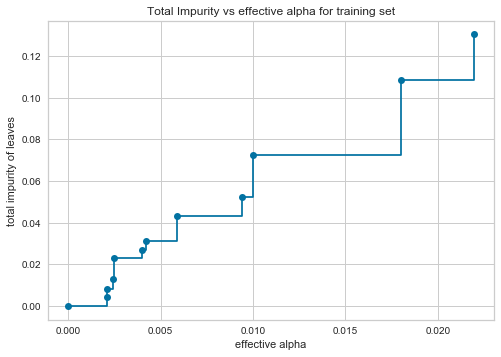

In [26]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.33801340287135273


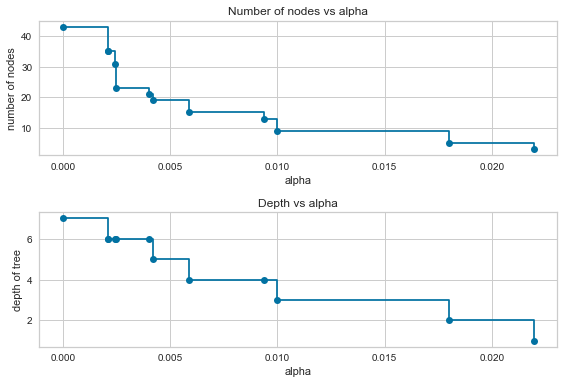

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

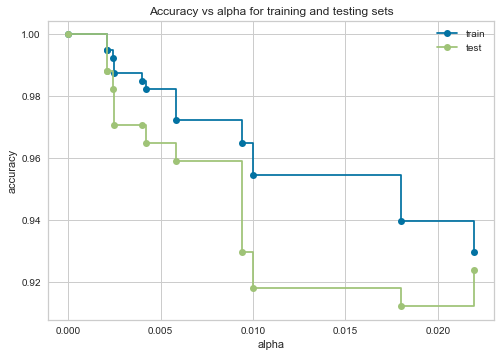

In [29]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_validation, Y_pred) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
#plt.xticks(np.arange(0, .2, step=0.05)) 
plt.show()

In [30]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0047)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)

scores_tree = cross_val_score(classifier, X_validation, Y_validation, scoring='roc_auc', n_jobs=-1)
tree_accuracy = (accuracy_score(Y_pred, Y_validation)) *100

print("Decision Tree Accuracy: {:.2f}%".format(tree_accuracy)) 
tree_cm = confusion_matrix(Y_validation, Y_pred)
tree_misclass = (Y_validation != Y_pred).sum()
tree_error_rate = (Y_validation != Y_pred).sum()/len(Y_pred)
tree_mean_roc_auc = (scores_tree.mean())*100
tree_train_accuracy = (classifier.score(X_train, Y_train))*100
tree_test_accuracy = (classifier.score(X_validation, Y_validation))*100

print("\nDecision Tree Confusion Matrix:\n")
print(tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(Y_validation, Y_pred))
print('Mean ROC AUC: {:.2f}%'.format(tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

Decision Tree Accuracy: 94.74%

Decision Tree Confusion Matrix:

[[104   4]
 [  5  58]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Mean ROC AUC: 89.77%
Misclassified examples: 9
Misclassification Rate: 0.05%
Training Set Accuracy: 98.24%
Test Set Accuracy: 94.74%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


## Random Forest

In [31]:
#splitting the data
Xf_train, Xf_val, Yf_train, Yf_val = train_test_split(X, Y, test_size=0.30, random_state=1)

In [32]:
#Checking our variables' shapes
print('Xf_Train Shape:', Xf_train.shape)
print('Yf_Train Shape:', Yf_train.shape)
print('Xf_val Shape:', Xf_val.shape)
print('Yf_val Shape:', Yf_val.shape)

Xf_Train Shape: (398, 30)
Yf_Train Shape: (398,)
Xf_val Shape: (171, 30)
Yf_val Shape: (171,)


In [33]:
sc = StandardScaler()
Xf_train = sc.fit_transform(Xf_train)
Xf_val = sc.transform(Xf_val)
pca = PCA(n_components=3)
Xf_train = pca.fit_transform(Xf_train)
Xf_val = pca.transform(Xf_val)

rf = DecisionTreeClassifier(random_state = 0)
rf.fit(Xf_train, Yf_train)
Yf_pred = rf.predict(Xf_val)

explained_variance = pca.explained_variance_ratio_

scores_forest = cross_val_score(rf, Xf_val, Yf_val, scoring='roc_auc', n_jobs=-1)
forest_accuracy = (accuracy_score(Yf_pred, Yf_val)) *100

print("Random Forest Accuracy: {:.2f}%".format(forest_accuracy)) 
forest_cm = confusion_matrix(Yf_val, Yf_pred)
forest_misclass = (Yf_val != Yf_pred).sum()
forest_error_rate = (Yf_val != Yf_pred).sum()/len(Yf_pred)
forest_mean_roc_auc = (scores_forest.mean())*100
forest_train_accuracy = (rf.score(Xf_train, Yf_train))*100
forest_test_accuracy = (rf.score(Xf_val, Yf_val))*100

print("\nRandom Forest Confusion Matrix:\n")
print(forest_cm)
print("\nRandom Forest Classification Report:\n")
print(classification_report(Yf_val, Yf_pred))
print('Mean ROC AUC: {:.2f}%'.format(forest_mean_roc_auc))
print('Misclassified examples: {:d}'.format(forest_misclass))
print('Misclassification Rate: {:.2f}%'.format(forest_error_rate))
print("Training Set Accuracy: {:.2f}%".format(forest_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(forest_test_accuracy))
print('--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]')

Random Forest Accuracy: 93.57%

Random Forest Confusion Matrix:

[[102   6]
 [  5  58]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Mean ROC AUC: 89.71%
Misclassified examples: 11
Misclassification Rate: 0.06%
Training Set Accuracy: 100.00%
Test Set Accuracy: 93.57%
--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]


## Tuning Our Hyperparameters

In [34]:
#Setting up our forest parameters
# Selecting the number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Features to be used at each step
max_features = ['auto','sqrt']
#Setting our depth for each tree
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)
#Setting minimum requirements for splitting a node
min_samples_split = [2,5,10]
#Setting the minimum number of samples at each leaf
min_samples_leaf = [1,2,4]
#Creating the method to train each tree
bootstrap = [True,False]

#Our search grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [35]:
#Using the grid we just created to search for the best HPMs and fit to our model
rfcancer = RandomForestClassifier()
rfc_rand = RandomizedSearchCV(estimator=rfcancer, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=24, n_jobs=-1)
rfc_rand.fit(Xf_train,Yf_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [36]:
#Finding our best parameters
rfc_rand.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [37]:
#Cross Validating our model
#Grid searching our random results
param_grid = {
    'bootstrap': [False],
    'max_depth':[80,90,100,110],
    'max_features':[3,4,5],
    'min_samples_split':[8,10,12],
    'min_samples_leaf':min_samples_leaf,
    'n_estimators':[100,200,300,1000]
}

#Creating the base model
rf_grid = RandomForestClassifier()

#Call the grid search
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid,
                       cv=3, n_jobs=-1, verbose=2)

In [38]:
#Fitting the grid to our model
grid_search.fit(Xf_train, Yf_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   56.5s finished


In [39]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

## Plugging in the best parameters

In [40]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, bootstrap=False, random_state=24)
best_rf.fit(Xf_train, Yf_train)
Yf_pred = best_rf.predict(Xf_val)

scores_forest = cross_val_score(best_rf, Xf_val, Yf_val, scoring='roc_auc', n_jobs=-1)
forest_accuracy = (accuracy_score(Yf_pred, Yf_val)) *100

print("Random Forest Accuracy: {:.2f}%".format(forest_accuracy)) 
forest_cm = confusion_matrix(Yf_val, Yf_pred)
forest_misclass = (Yf_val != Yf_pred).sum()
forest_error_rate = (Yf_val != Yf_pred).sum()/len(Yf_pred)
forest_mean_roc_auc = (scores_forest.mean())*100
forest_train_accuracy = (rf.score(Xf_train, Yf_train))*100
forest_test_accuracy = (rf.score(Xf_val, Yf_val))*100

print("\nRandom Forest Confusion Matrix:\n")
print(forest_cm)
print("\nRandom Forest Classification Report:\n")
print(classification_report(Yf_val, Yf_pred))
print('Mean ROC AUC: {:.2f}%'.format(forest_mean_roc_auc))
print('Misclassified examples: {:d}'.format(forest_misclass))
print('Misclassification Rate: {:.2f}%'.format(forest_error_rate))
print("Training Set Accuracy: {:.2f}%".format(forest_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(forest_test_accuracy))
print('--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]')

Random Forest Accuracy: 94.74%

Random Forest Confusion Matrix:

[[104   4]
 [  5  58]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Mean ROC AUC: 91.99%
Misclassified examples: 9
Misclassification Rate: 0.05%
Training Set Accuracy: 100.00%
Test Set Accuracy: 93.57%
--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]


## Credit Card Data Set

In [7]:
cc = read_csv(r"X:\SLC\Term 2\ADMN 5016\Group Project\Creditcard.csv", skiprows=1)

In [8]:
cc.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
cc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
cc.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [43]:
Xc = cc.drop('default payment next month',axis=1)
yc = cc['default payment next month']
encoder = LabelEncoder()
encoder.fit(yc)
Yc = encoder.transform(yc)
print(Xc)
print(Yc)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [44]:
Xc_train, Xc_validation, Yc_train, Yc_validation = train_test_split(Xc, Yc, test_size=0.30, random_state=1)
sc = StandardScaler()
Xc_train = sc.fit_transform(Xc_train)
Xc_validation = sc.transform(Xc_validation)
pca = PCA(n_components=3)
Xc_train = pca.fit_transform(Xc_train)
Xc_validation = pca.transform(Xc_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
cc_class = DecisionTreeClassifier(random_state = 0)
cc_class.fit(Xc_train, Yc_train)
Yc_pred = cc_class.predict(Xc_validation)

cc_scores_tree = cross_val_score(cc_class, Xc_validation, Yc_validation, scoring='roc_auc', n_jobs=-1)
cc_tree_accuracy = (accuracy_score(Yc_pred, Yc_validation)) *100

print("Decision Tree Accuracy: {:.2f}%".format(cc_tree_accuracy)) 
cc_tree_cm = confusion_matrix(Yc_validation, Yc_pred)
cc_tree_misclass = (Yc_validation != Yc_pred).sum()
cc_tree_error_rate = (Yc_validation != Yc_pred).sum()/len(Yc_pred)
cc_tree_mean_roc_auc = (cc_scores_tree.mean())*100
cc_tree_train_accuracy = (cc_class.score(Xc_train, Yc_train))*100
cc_tree_test_accuracy = (cc_class.score(Xc_validation, Yc_validation))*100

print("\nDecision Tree Confusion Matrix:\n")
print(cc_tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(Yc_validation, Yc_pred))
print('Mean ROC AUC: {:.2f}%'.format(cc_tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(cc_tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(cc_tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(cc_tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(cc_tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

[0.27301938 0.17048949 0.06593949]
Decision Tree Accuracy: 70.38%

Decision Tree Confusion Matrix:

[[5626 1374]
 [1292  708]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      7000
           1       0.34      0.35      0.35      2000

    accuracy                           0.70      9000
   macro avg       0.58      0.58      0.58      9000
weighted avg       0.71      0.70      0.71      9000

Mean ROC AUC: 59.46%
Misclassified examples: 2666
Misclassification Rate: 0.30%
Training Set Accuracy: 100.00%
Test Set Accuracy: 70.38%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


In [45]:
#Prunning via a cost complexity parameter
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(Xc_train, Yc_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
var = path
print(var)

{'ccp_alphas': array([0.00000000e+00, 3.17460317e-05, 3.17460317e-05, ...,
       1.56998525e-03, 3.71199086e-03, 3.88186673e-02]), 'impurities': array([0.00000000e+00, 6.34920635e-05, 1.26984127e-04, ...,
       3.01521514e-01, 3.05233505e-01, 3.44052172e-01])}


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

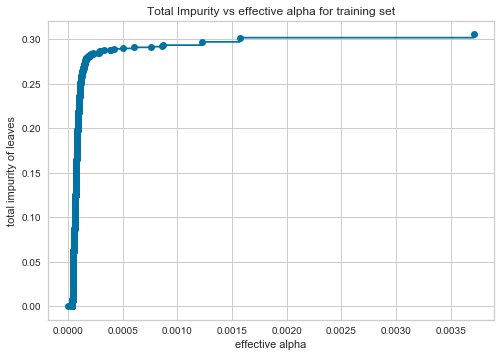

In [46]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xc_train, Yc_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03881866734560108


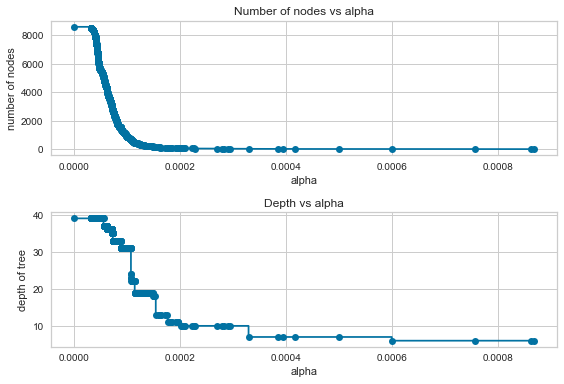

In [51]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

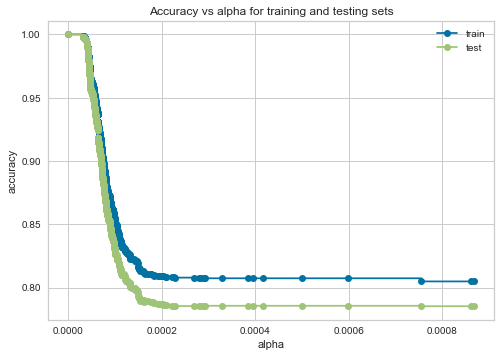

In [52]:
train_scores = [clf.score(Xc_train, Yc_train) for clf in clfs]
test_scores = [clf.score(Xc_validation, Yc_pred) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
#plt.xticks(np.arange(0, .2, step=0.05)) 
plt.show()

In [53]:
cc_classifier = DecisionTreeClassifier(ccp_alpha=0.0025)
cc_classifier.fit(Xc_train, Yc_train)
Yc_pred = cc_classifier.predict(Xc_validation)

cc_scores_tree = cross_val_score(cc_classifier, Xc_validation, Yc_validation, scoring='roc_auc', n_jobs=-1)
cc_tree_accuracy = (accuracy_score(Yc_pred, Yc_validation)) *100

print("Decision Tree Accuracy: {:.2f}%".format(cc_tree_accuracy)) 
cc_tree_cm = confusion_matrix(Yc_validation, Yc_pred)
cc_tree_misclass = (Yc_validation != Yc_pred).sum()
cc_tree_error_rate = (Yc_validation != Yc_pred).sum()/len(Yc_pred)
cc_tree_mean_roc_auc = (cc_scores_tree.mean())*100
cc_tree_train_accuracy = (cc_classifier.score(Xc_train, Yc_train))*100
cc_tree_test_accuracy = (cc_classifier.score(Xc_validation, Yc_validation))*100

print("\nDecision Tree Confusion Matrix:\n")
print(cc_tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(Yc_validation, Yc_pred))
print('Mean ROC AUC: {:.2f}%'.format(cc_tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(cc_tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(cc_tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(cc_tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(cc_tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

Decision Tree Accuracy: 80.03%

Decision Tree Confusion Matrix:

[[6667  333]
 [1464  536]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7000
           1       0.62      0.27      0.37      2000

    accuracy                           0.80      9000
   macro avg       0.72      0.61      0.63      9000
weighted avg       0.77      0.80      0.77      9000

Mean ROC AUC: 65.88%
Misclassified examples: 1797
Misclassification Rate: 0.20%
Training Set Accuracy: 80.27%
Test Set Accuracy: 80.03%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


## Random Forest

In [54]:
#splitting the data
Xc_train, Xc_val, Yc_train, Yc_val = train_test_split(Xc, Yc, test_size=0.30, random_state=1)

In [55]:
sc = StandardScaler()
Xc_train = sc.fit_transform(Xc_train)
Xc_val = sc.transform(Xc_val)
pca = PCA(n_components=3)
Xc_train = pca.fit_transform(Xc_train)
Xc_val = pca.transform(Xc_val)

explained_variance = pca.explained_variance_ratio_

cc_rf = DecisionTreeClassifier(random_state = 0)
cc_rf.fit(Xc_train, Yc_train)
Yc_pred = cc_rf.predict(Xc_val)

cc_scores_forest = cross_val_score(cc_rf, Xc_val, Yc_val, scoring='roc_auc', n_jobs=-1)
cc_forest_accuracy = (accuracy_score(Yc_pred, Yc_val)) *100

print("Random Forest Accuracy: {:.2f}%".format(cc_forest_accuracy)) 
cc_forest_cm = confusion_matrix(Yc_val, Yc_pred)
cc_forest_misclass = (Yc_val != Yc_pred).sum()
cc_forest_error_rate = (Yc_val != Yc_pred).sum()/len(Yc_pred)
cc_forest_mean_roc_auc = (cc_scores_forest.mean())*100
cc_forest_train_accuracy = (cc_rf.score(Xc_train, Yc_train))*100
cc_forest_test_accuracy = (cc_rf.score(Xc_val, Yc_val))*100

print("\nRandom Forest Confusion Matrix:\n")
print(cc_forest_cm)
print("\nRandom Forest Classification Report:\n")
print(classification_report(Yc_val, Yc_pred))
print('Mean ROC AUC: {:.2f}%'.format(cc_forest_mean_roc_auc))
print('Misclassified examples: {:d}'.format(cc_forest_misclass))
print('Misclassification Rate: {:.2f}%'.format(cc_forest_error_rate))
print("Training Set Accuracy: {:.2f}%".format(cc_forest_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(cc_forest_test_accuracy))
print('--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]')

Random Forest Accuracy: 71.80%

Random Forest Confusion Matrix:

[[5741 1259]
 [1279  721]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7000
           1       0.36      0.36      0.36      2000

    accuracy                           0.72      9000
   macro avg       0.59      0.59      0.59      9000
weighted avg       0.72      0.72      0.72      9000

Mean ROC AUC: 59.06%
Misclassified examples: 2538
Misclassification Rate: 0.28%
Training Set Accuracy: 100.00%
Test Set Accuracy: 71.80%
--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]


## Tuning the Model

In [56]:
#Setting up our forest parameters
# Selecting the number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Features to be used at each step
max_features = ['auto','sqrt']
#Setting our depth for each tree
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)
#Setting minimum requirements for splitting a node
min_samples_split = [2,5,10]
#Setting the minimum number of samples at each leaf
min_samples_leaf = [1,2,4]
#Creating the method to train each tree
bootstrap = [True,False]

#Our search grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [57]:
#Using the grid we just created to search for the best HPMs and fit to our model
rfcredit = RandomForestClassifier()
rfcred_rand = RandomizedSearchCV(estimator=rfcredit, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=24, n_jobs=-1)
rfcred_rand.fit(Xc_train,Yc_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [58]:
#Finding our best parameters
rfcred_rand.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [59]:
#Cross Validating our model
#Grid searching our random results
param_grid = {
    'bootstrap': [False],
    'max_depth':[80,90,100,110],
    'max_features':[3,4,5],
    'min_samples_split':[8,10,12],
    'min_samples_leaf':min_samples_leaf,
    'n_estimators':[100,200,300,1000]
}

#Creating the base model
cc_rf_grid = RandomForestClassifier()

#Call the grid search
grid_search = GridSearchCV(estimator=cc_rf_grid, param_grid=param_grid,
                       cv=3, n_jobs=-1, verbose=2)

In [60]:
#Fitting the grid to our model
grid_search.fit(Xc_train, Yc_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 26.8min finished


In [61]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [62]:
## Plugging in Best Parameters

In [63]:
best_cc_rf = RandomForestClassifier(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, bootstrap=False, random_state=24)
best_cc_rf.fit(Xc_train, Yc_train)
Yc_pred = best_cc_rf.predict(Xc_val)

cc_scores_forest = cross_val_score(best_cc_rf, Xc_val, Yc_val, scoring='roc_auc', n_jobs=-1)
cc_forest_accuracy = (accuracy_score(Yc_pred, Yc_val)) *100

print("Random Forest Accuracy: {:.2f}%".format(cc_forest_accuracy)) 
cc_forest_cm = confusion_matrix(Yc_val, Yc_pred)
cc_forest_misclass = (Yc_val != Yc_pred).sum()
cc_forest_error_rate = (Yc_val != Yc_pred).sum()/len(Yc_pred)
cc_forest_mean_roc_auc = (cc_scores_forest.mean())*100
cc_forest_train_accuracy = (best_cc_rf.score(Xc_train, Yc_train))*100
cc_forest_test_accuracy = (best_cc_rf.score(Xc_val, Yc_val))*100

print("\nRandom Forest Confusion Matrix:\n")
print(cc_forest_cm)
print("\nRandom Forest Classification Report:\n")
print(classification_report(Yc_val, Yc_pred))
print('Mean ROC AUC: {:.2f}%'.format(cc_forest_mean_roc_auc))
print('Misclassified examples: {:d}'.format(cc_forest_misclass))
print('Misclassification Rate: {:.2f}%'.format(cc_forest_error_rate))
print("Training Set Accuracy: {:.2f}%".format(cc_forest_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(cc_forest_test_accuracy))
print('--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]')

Random Forest Accuracy: 74.88%

Random Forest Confusion Matrix:

[[6112  888]
 [1373  627]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      7000
           1       0.41      0.31      0.36      2000

    accuracy                           0.75      9000
   macro avg       0.62      0.59      0.60      9000
weighted avg       0.73      0.75      0.74      9000

Mean ROC AUC: 65.40%
Misclassified examples: 2261
Misclassification Rate: 0.25%
Training Set Accuracy: 88.26%
Test Set Accuracy: 74.88%
--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]


## Wheat Data

In [12]:
wheat = read_csv(r"X:\SLC\Term 2\ADMN 5016\Group Project\wheat.csv")

In [13]:
wheat.head(5)

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [14]:
wheat.describe()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [15]:
wheat.tail()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [66]:
Xw = wheat.drop('Variety',axis=1)
yw = wheat['Variety']
encoder = LabelEncoder()
encoder.fit(yw)
Yw = encoder.transform(yw)
Yw = preprocessing.label_binarize(Yw, classes=[0, 1, 2])
#print(Xw)
#print(Yw)

In [67]:
Xw_train, Xw_validation, Yw_train, Yw_validation = train_test_split(Xw, Yw, test_size=0.30, random_state=1)
sc = StandardScaler()
Xw_train = sc.fit_transform(Xw_train)
Xw_validation = sc.transform(Xw_validation)
pca = PCA(n_components=3)
Xw_train = pca.fit_transform(Xw_train)
Xw_validation = pca.transform(Xw_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
w_class = DecisionTreeClassifier(random_state = 0)
w_class.fit(Xw_train, Yw_train)
Yw_pred = w_class.predict(Xw_validation)

w_scores_tree = cross_val_score(w_class, Xw_validation, Yw_validation, scoring='roc_auc', n_jobs=-1)
w_tree_accuracy = (accuracy_score(Yw_pred, Yw_validation)) *100

print("Decision Tree Accuracy: {:.2f}%".format(w_tree_accuracy)) 
w_tree_cm = confusion_matrix(Yw_validation.argmax(axis=1), Yw_pred.argmax(axis=1))
w_tree_misclass = (Yw_validation != Yw_pred).sum()
w_tree_error_rate = (Yw_validation != Yw_pred).sum()/len(Yw_pred)
w_tree_mean_roc_auc = (w_scores_tree.mean())*100
w_tree_train_accuracy = (w_class.score(Xw_train, Yw_train))*100
w_tree_test_accuracy = (w_class.score(Xw_validation, Yw_validation))*100

print("\nDecision Tree Confusion Matrix:\n")
print(w_tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(Yw_validation, Yw_pred))
print('Mean ROC AUC: {:.2f}%'.format(w_tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(w_tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(w_tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(w_tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(w_tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

[0.71104435 0.17472713 0.10089124]
Decision Tree Accuracy: 92.06%

Decision Tree Confusion Matrix:

[[20  0  4]
 [ 0 18  0]
 [ 1  0 20]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       1.00      1.00      1.00        18
           2       0.83      0.95      0.89        21

   micro avg       0.92      0.92      0.92        63
   macro avg       0.93      0.93      0.93        63
weighted avg       0.93      0.92      0.92        63
 samples avg       0.92      0.92      0.92        63

Mean ROC AUC: 92.60%
Misclassified examples: 10
Misclassification Rate: 0.16%
Training Set Accuracy: 100.00%
Test Set Accuracy: 92.06%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


{'ccp_alphas': array([0.        , 0.00388727, 0.00388727, 0.00418629, 0.0048051 ,
       0.00563654, 0.00576602, 0.00647878, 0.02425917, 0.03253317,
       0.12515964, 0.18687658]), 'impurities': array([0.        , 0.00777454, 0.01554908, 0.02392166, 0.03353185,
       0.04480493, 0.062103  , 0.07506056, 0.09931973, 0.13185289,
       0.25701254, 0.44388912])}


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

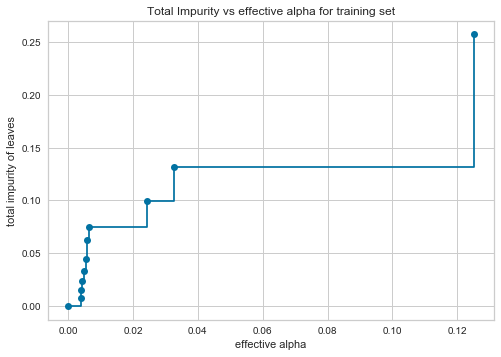

In [68]:
#Prunning via a cost complexity parameter
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(Xw_train, Yw_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
var = path
print(var)
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [69]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xw_train, Yw_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18687658345846742


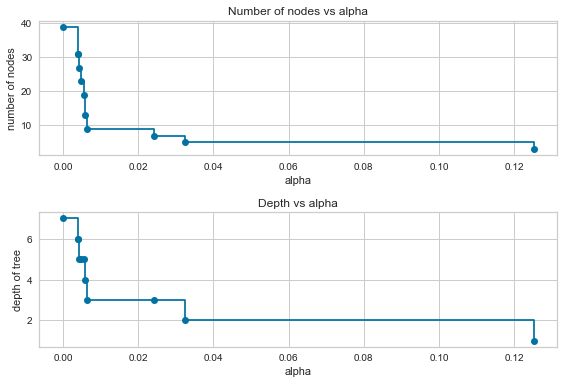

In [70]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

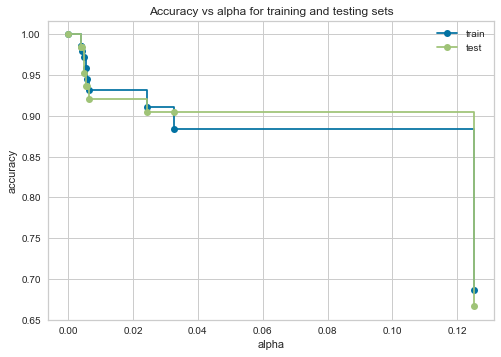

In [71]:
train_scores = [clf.score(Xw_train, Yw_train) for clf in clfs]
test_scores = [clf.score(Xw_validation, Yw_pred) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
#plt.xticks(np.arange(0, .2, step=0.05)) 
plt.show()

In [72]:
wh_classifier = DecisionTreeClassifier(ccp_alpha=0.025)
wh_classifier.fit(Xw_train, Yw_train)
Yw_pred = wh_classifier.predict(Xw_validation)

wh_scores_tree = cross_val_score(wh_classifier, Yw_validation, Yw_validation, scoring='roc_auc', n_jobs=-1)
wh_tree_accuracy = (accuracy_score(Yw_pred, Yw_validation)) *100

print("Decision Tree Accuracy: {:.2f}%".format(wh_tree_accuracy)) 
wh_tree_cm = confusion_matrix(Yw_validation.argmax(axis=1), Yw_pred.argmax(axis=1))
wh_tree_misclass = (Yw_validation != Yw_pred).sum()
wh_tree_error_rate = (Yw_validation != Yw_pred).sum()/len(Yw_pred)
wh_tree_mean_roc_auc = (wh_scores_tree.mean())*100
wh_tree_train_accuracy = (wh_classifier.score(Xw_train, Yw_train))*100
wh_tree_test_accuracy = (wh_classifier.score(Xw_validation, Yw_validation))*100

print("\nDecision Tree Confusion Matrix:\n")
print(wh_tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(Yw_validation, Yw_pred))
print('Mean ROC AUC: {:.2f}%'.format(wh_tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(wh_tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(wh_tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(wh_tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(wh_tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

Decision Tree Accuracy: 88.89%

Decision Tree Confusion Matrix:

[[17  2  5]
 [ 0 18  0]
 [ 0  0 21]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.90      1.00      0.95        18
           2       0.81      1.00      0.89        21

   micro avg       0.89      0.89      0.89        63
   macro avg       0.90      0.90      0.89        63
weighted avg       0.91      0.89      0.88        63
 samples avg       0.89      0.89      0.89        63

Mean ROC AUC: 100.00%
Misclassified examples: 14
Misclassification Rate: 0.22%
Training Set Accuracy: 91.16%
Test Set Accuracy: 88.89%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


## Random Forest

In [73]:
Xw_train, Xw_val, Yw_train, Yw_val = train_test_split(Xw, Yw, test_size=0.30, random_state=1)
sc = StandardScaler()
Xw_train = sc.fit_transform(Xw_train)
Xw_val = sc.transform(Xw_val)
pca = PCA(n_components=3)
Xw_train = pca.fit_transform(Xw_train)
Xw_val = pca.transform(Xw_val)

explained_variance = pca.explained_variance_ratio_

wh_rf = DecisionTreeClassifier(random_state = 0)
wh_rf.fit(Xw_train, Yw_train)
Yw_pred = wh_rf.predict(Xw_val)

wh_scores_forest = cross_val_score(wh_rf, Xw_val, Yw_val, scoring='roc_auc', n_jobs=-1)
wh_forest_accuracy = (accuracy_score(Yw_pred, Yw_val)) *100

print("Random Forest Accuracy: {:.2f}%".format(wh_forest_accuracy)) 
wh_forest_cm = confusion_matrix(Yw_validation.argmax(axis=1), Yw_pred.argmax(axis=1))
wh_forest_misclass = (Yw_val != Yw_pred).sum()
wh_forest_error_rate = (Yw_val != Yw_pred).sum()/len(Yw_pred)
wh_forest_mean_roc_auc = (wh_scores_forest.mean())*100
wh_forest_train_accuracy = (wh_rf.score(Xw_train, Yw_train))*100
wh_forest_test_accuracy = (wh_rf.score(Xw_val, Yw_val))*100

print("\nRandom Forest Confusion Matrix:\n")
print(wh_forest_cm)
print("\nRandom Forest Classification Report:\n")
print(classification_report(Yw_val, Yw_pred))
print('Mean ROC AUC: {:.2f}%'.format(wh_forest_mean_roc_auc))
print('Misclassified examples: {:d}'.format(wh_forest_misclass))
print('Misclassification Rate: {:.2f}%'.format(wh_forest_error_rate))
print("Training Set Accuracy: {:.2f}%".format(wh_forest_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(wh_forest_test_accuracy))
print('--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]')

Random Forest Accuracy: 92.06%

Random Forest Confusion Matrix:

[[20  0  4]
 [ 0 18  0]
 [ 1  0 20]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       1.00      1.00      1.00        18
           2       0.83      0.95      0.89        21

   micro avg       0.92      0.92      0.92        63
   macro avg       0.93      0.93      0.93        63
weighted avg       0.93      0.92      0.92        63
 samples avg       0.92      0.92      0.92        63

Mean ROC AUC: 92.60%
Misclassified examples: 10
Misclassification Rate: 0.16%
Training Set Accuracy: 100.00%
Test Set Accuracy: 92.06%
--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]


## Selecting Best Parameters

In [74]:
#Setting up our forest parameters
# Selecting the number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Features to be used at each step
max_features = ['auto','sqrt']
#Setting our depth for each tree
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)
#Setting minimum requirements for splitting a node
min_samples_split = [2,5,10]
#Setting the minimum number of samples at each leaf
min_samples_leaf = [1,2,4]
#Creating the method to train each tree
bootstrap = [True,False]

#Our search grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [75]:
#Using the grid we just created to search for the best HPMs and fit to our model
rfwh = RandomForestClassifier()
rfwh_rand = RandomizedSearchCV(estimator=rfwh, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=24, n_jobs=-1)
rfwh_rand.fit(Xw_train,Yw_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [76]:
#Finding our best parameters
rfwh_rand.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [77]:
#Cross Validating our model
#Grid searching our random results
param_grid = {
    'bootstrap': [False],
    'max_depth':[80,90,100,110],
    'max_features':[3,4,5],
    'min_samples_split':[8,10,12],
    'min_samples_leaf':min_samples_leaf,
    'n_estimators':[100,200,300,1000]
}

#Creating the base model
wh_rf_grid = RandomForestClassifier()

#Call the grid search
grid_search = GridSearchCV(estimator=wh_rf_grid, param_grid=param_grid,
                       cv=3, n_jobs=-1, verbose=2)

In [78]:
#Fitting the grid to our model
grid_search.fit(Xw_train, Yw_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   56.1s finished


In [79]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

## Plug in the parameters we just found into our model

In [80]:
best_wh_rf = RandomForestClassifier(n_estimators=200, max_depth=80, max_features=3, min_samples_leaf=1, min_samples_split=10, bootstrap=False, random_state=24)
best_wh_rf.fit(Xw_train, Yw_train)
Yw_pred = best_wh_rf.predict(Xw_val)

wh_scores_forest = cross_val_score(best_wh_rf, Xw_val, Yw_val, scoring='roc_auc', n_jobs=-1)
wh_forest_accuracy = (accuracy_score(Yw_pred, Yw_val)) *100

print("Random Forest Accuracy: {:.2f}%".format(wh_forest_accuracy)) 
wh_forest_cm = confusion_matrix(Yw_validation.argmax(axis=1), Yw_pred.argmax(axis=1))
wh_forest_misclass = (Yw_val != Yw_pred).sum()
wh_forest_error_rate = (Yw_val != Yw_pred).sum()/len(Yw_pred)
wh_forest_mean_roc_auc = (wh_scores_forest.mean())*100
wh_forest_train_accuracy = (best_wh_rf.score(Xw_train, Yw_train))*100
wh_forest_test_accuracy = (best_wh_rf.score(Xw_val, Yw_val))*100

print("\nRandom Forest Confusion Matrix:\n")
print(wh_forest_cm)
print("\nRandom Forest Classification Report:\n")
print(classification_report(Yw_val, Yw_pred))
print('Mean ROC AUC: {:.2f}%'.format(wh_forest_mean_roc_auc))
print('Misclassified examples: {:d}'.format(wh_forest_misclass))
print('Misclassification Rate: {:.2f}%'.format(wh_forest_error_rate))
print("Training Set Accuracy: {:.2f}%".format(wh_forest_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(wh_forest_test_accuracy))
print('--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]')

Random Forest Accuracy: 88.89%

Random Forest Confusion Matrix:

[[18  0  6]
 [ 1 17  0]
 [ 0  0 21]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        24
           1       1.00      0.94      0.97        18
           2       0.78      1.00      0.88        21

   micro avg       0.89      0.89      0.89        63
   macro avg       0.91      0.90      0.89        63
weighted avg       0.91      0.89      0.89        63
 samples avg       0.89      0.89      0.89        63

Mean ROC AUC: 92.12%
Misclassified examples: 14
Misclassification Rate: 0.22%
Training Set Accuracy: 94.56%
Test Set Accuracy: 88.89%
--------------- Random Forest Classifier -- Parameters specified-- : classifier.fit [Done]
